# 1. Graph pre-processing

###  1.1. Transforming smiles codes in molecular dataset to graphs

num                                                      26
name                                               androsan
p_np                                                      0
smiles    C[C@]1(O)CC[C@H]2[C@@H]3CCC4=CC(=O)CC[C@]4(C)[...
Name: 25, dtype: object


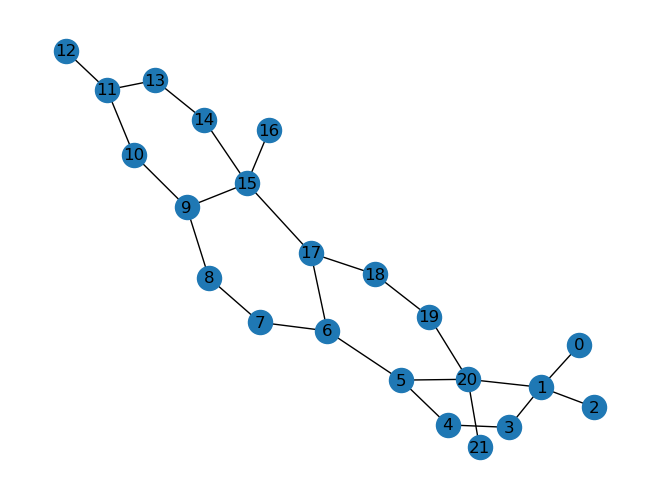

In [32]:
# Convert SMILES strings to graphs
import numpy as np
import pandas as pd
import networkx as nx
from rdkit import Chem
from rdkit import RDLogger

# Read the dataset 
df = pd.read_csv('./data/Molecular_Sample.csv')

# Display the first row of the dataset
print(df.iloc[25])

graphs = []
for smiles in df['smiles']:
    mol = Chem.MolFromSmiles(smiles, sanitize=False)
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=bond.GetBondType())
    graphs.append(G)
    
#Visualize the first graph
nx.draw(graphs[25], with_labels=True)

### 1.2. Print first 25 rows in dataset

In [33]:
print(df.iloc[0:25])


    num                  name  p_np  \
0     1            Propanolol     1   
1     2  Terbutylchlorambucil     1   
2     3                Y-G 20     0   
3     4           cloxacillin     1   
4     5          cefoperazone     1   
5     6      rolitetracycline     1   
6     7           ondansetron     1   
7     8             diltiazem     1   
8     9             Amiloride     1   
9    10            M2L-663581     0   
10   11             alovudine     1   
11   12             methadone     1   
12   13            alfentanil     1   
13   14              BRL53080     1   
14   15           hyoscyamine     1   
15   16             glyburide     1   
16   17           lamotrigine     1   
17   18            MIL-663581     0   
18   19      acetylsalicylate     0   
19   20           allopurinol     0   
20   21           Alprostadil     0   
21   22         aminophylline     0   
22   23            Amiodarone     0   
23   24           amoxicillin     0   
24   25            ampici

### 1.3. Molecular Visualization

Propanolol


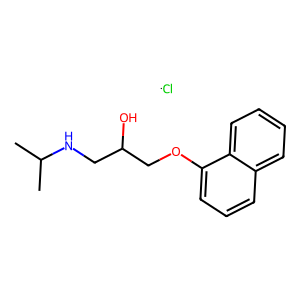

Terbutylchlorambucil


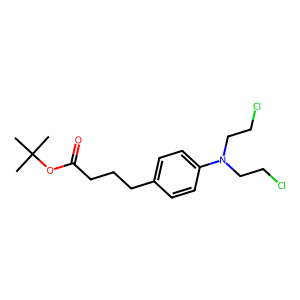

Y-G 20


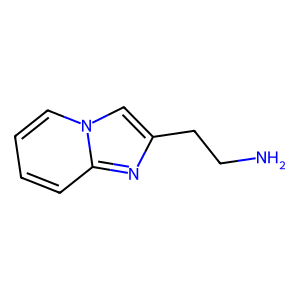

cloxacillin


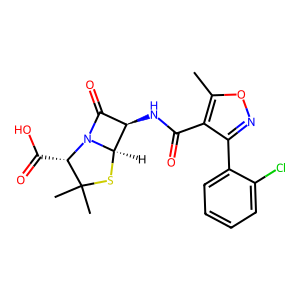

cefoperazone


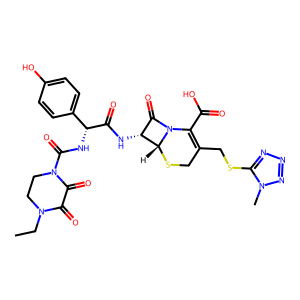

rolitetracycline


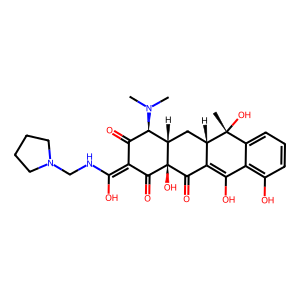

ondansetron


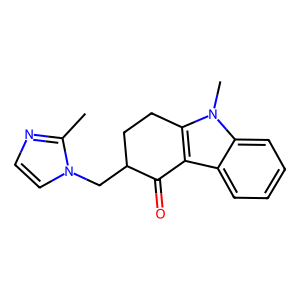

diltiazem


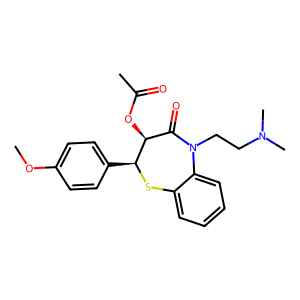

Amiloride


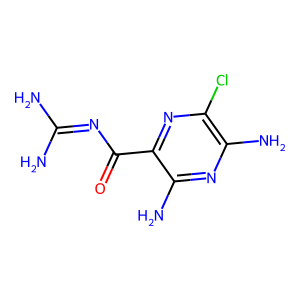

M2L-663581


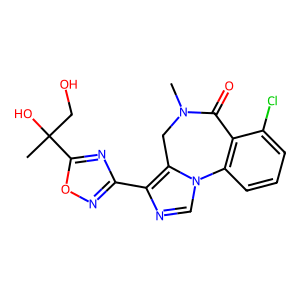

alovudine


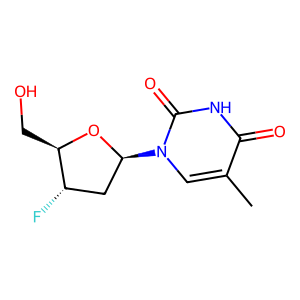

methadone


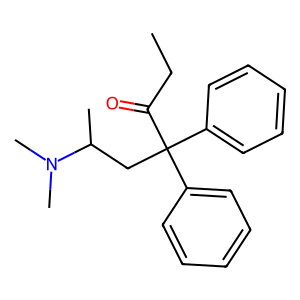

alfentanil


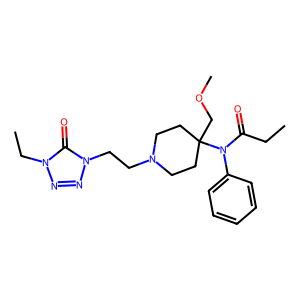

BRL53080


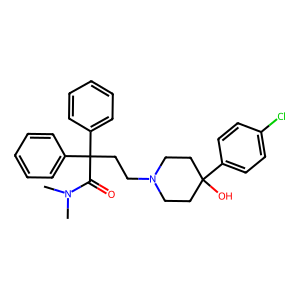

hyoscyamine


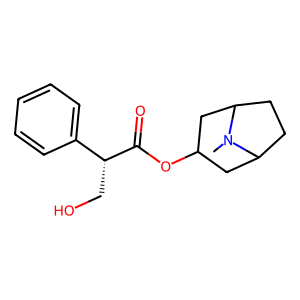

glyburide


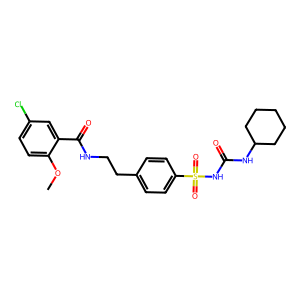

lamotrigine


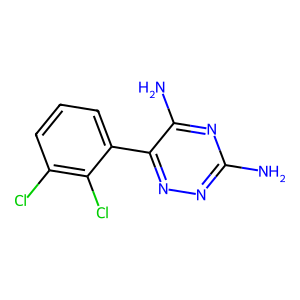

MIL-663581


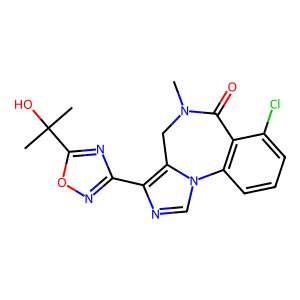

acetylsalicylate


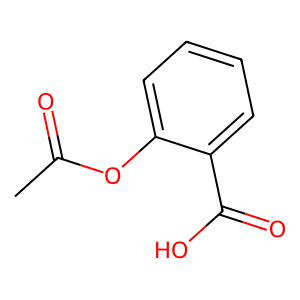

allopurinol


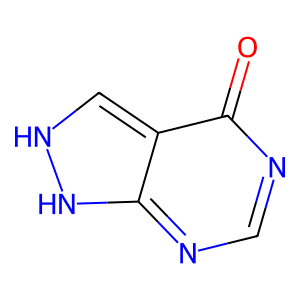

Alprostadil


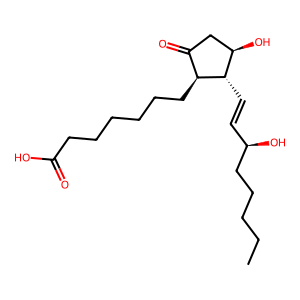

aminophylline


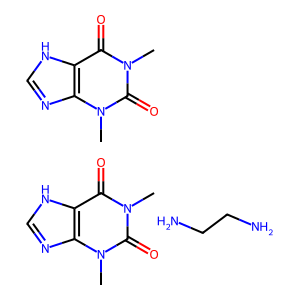

Amiodarone


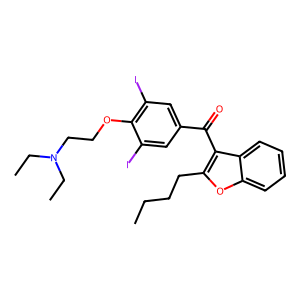

amoxicillin


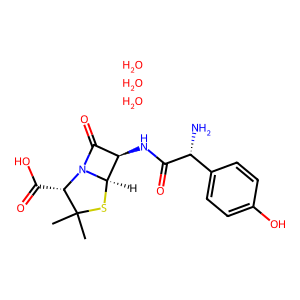

ampicillin


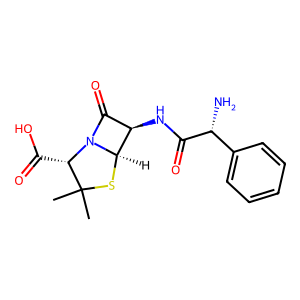

androsan


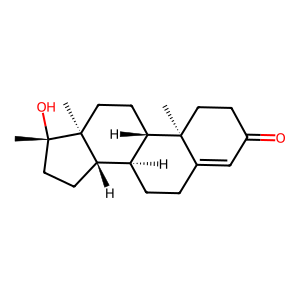

In [34]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Visualize each molecule
for idx, row in data.iterrows():
    smiles = row['smiles']
    name = row['name']
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Generate image
        img = Draw.MolToImage(mol, size=(300, 300))
        # Display the image
        print(name)
        display(img)


### 2. Graph Classification task 

#### Classifier: SVM with different type of graph features

In [20]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

##### 2.1 Extract node features (example: sum of atom types)

In [21]:
node_features = []
for graph in graphs:
    features = np.sum(graph, axis=1)
    node_features.append(features)

Accuracy: 0.16666666666666666


#### Check node features

In [35]:
node_features

[array([0, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3]),
 array([3, 1, 2, 4, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2,
        1]),
 array([2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1]),
 array([1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 4, 1, 1,
        3, 3, 3, 1, 3, 1, 1]),
 array([1, 2, 3, 2, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1,
        3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2, 3, 1, 3, 1]),
 array([1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2, 3, 4, 1, 1, 3, 1,
        4, 1, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1]),
 array([1, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 3]),
 array([1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 1,
        3, 1, 3, 2, 3, 1, 1]),
 array([1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1]),
 array([1, 2, 4, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 2, 2,
        2, 3, 1, 1, 2]),
 array([1, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 1, 2, 3, 1]),
 array([1, 2, 

#### 2.2. Graph features by summation of node features


In [37]:
aggregated_features = [np.sum(features, axis=0) for features in node_features]


#### Check graph features

In [38]:
aggregated_features

[40,
 46,
 26,
 64,
 96,
 84,
 50,
 62,
 30,
 60,
 36,
 48,
 64,
 74,
 46,
 70,
 34,
 58,
 26,
 22,
 50,
 62,
 66,
 54,
 52,
 50]

#### Split data into train and test sets


In [39]:
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)

# Reshape the input arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)



#### Train SVM classifier


In [40]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.16666666666666666


#### 2.2. Graph features by maximum of node features


In [41]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (example: sum of atom types)
node_features = []
for graph in graphs:
    features = np.sum(graph, axis=1)
    node_features.append(features)

# Aggregate node features (max)
aggregated_features = [np.max(features, axis=0) for features in node_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)

# Reshape the input arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Train SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [42]:
aggregated_features

[3, 4, 3, 4, 3, 4, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4]

#### 2.3. Graph features by minimum of node features


In [43]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from rdkit import Chem
from rdkit.Chem import AllChem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (example: sum of atom types)
node_features = []
for graph in graphs:
    features = np.sum(graph, axis=1)
    node_features.append(features)

# Aggregate node features (min)
aggregated_features = [np.min(features, axis=0) for features in node_features]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)

# Reshape the input arrays
X_train_reshaped = np.array(X_train).reshape(-1, 1)
X_test_reshaped = np.array(X_test).reshape(-1, 1)

# Train SVM classifier
clf = svm.SVC(kernel='linear')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [44]:
node_features

[array([0, 1, 3, 1, 2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3]),
 array([3, 1, 2, 4, 1, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2,
        1]),
 array([2, 2, 2, 2, 3, 3, 2, 3, 2, 2, 2, 1]),
 array([1, 3, 2, 2, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 1, 2, 3, 3, 2, 4, 1, 1,
        3, 3, 3, 1, 3, 1, 1]),
 array([1, 2, 3, 2, 2, 3, 3, 1, 2, 3, 3, 1, 2, 3, 3, 2, 2, 3, 3, 3, 3, 1,
        3, 1, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 3, 1, 2, 2, 3, 1, 3, 1]),
 array([1, 3, 1, 3, 3, 2, 3, 3, 3, 1, 3, 3, 1, 2, 2, 2, 3, 4, 1, 1, 3, 1,
        4, 1, 3, 1, 3, 3, 1, 2, 2, 3, 2, 2, 2, 2, 3, 1]),
 array([1, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 3, 1, 3, 1, 3, 3, 2, 2, 2, 2, 3]),
 array([1, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 2, 2, 3, 1, 1,
        3, 1, 3, 2, 3, 1, 1]),
 array([1, 3, 1, 2, 3, 1, 3, 2, 3, 1, 3, 1, 2, 3, 1]),
 array([1, 2, 4, 1, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 3, 1, 3, 3, 3, 2, 2,
        2, 3, 1, 1, 2]),
 array([1, 3, 2, 3, 3, 2, 3, 1, 3, 2, 1, 2, 3, 1, 2, 3, 1]),
 array([1, 2, 

In [45]:
aggregated_features

[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]

#### 2.4 Graph features as a concatenation of node centralities (degree, closeness, betweenness)


In [46]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
import networkx as nx

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (degree centrality, betweenness centrality, closeness centrality)
node_features = []
for graph in graphs:
    G = nx.from_numpy_array(graph)
    degree_centrality = list(nx.degree_centrality(G).values())
    betweenness_centrality = list(nx.betweenness_centrality(G).values())
    closeness_centrality = list(nx.closeness_centrality(G).values())
    features = np.column_stack((degree_centrality, betweenness_centrality, closeness_centrality))
    node_features.append(features)

# Aggregate node features (sum)
aggregated_features = [np.sum(features, axis=0) for features in node_features]

# Reshape the input arrays
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['p_np'], test_size=0.2, random_state=42)
X_train_reshaped = np.array(X_train).reshape(-1, 3)  # 3 centrality features
X_test_reshaped = np.array(X_test).reshape(-1, 3)

# Train SVM classifier
clf = svm.SVC(kernel='sigmoid')
clf.fit(X_train_reshaped, y_train)

# Predict on test set
y_pred = clf.predict(X_test_reshaped)

# Evaluate accuracy
accuracy = clf.score(X_test_reshaped, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.6666666666666666


In [47]:
node_features

[array([[0.        , 0.        , 0.        ],
        [0.05263158, 0.        , 0.14329943],
        [0.15789474, 0.19298246, 0.16718266],
        [0.05263158, 0.        , 0.14329943],
        [0.10526316, 0.26315789, 0.1916026 ],
        [0.10526316, 0.32748538, 0.21862348],
        [0.15789474, 0.4502924 , 0.24713959],
        [0.05263158, 0.        , 0.19828641],
        [0.10526316, 0.4502924 , 0.26644737],
        [0.10526316, 0.46783626, 0.27955134],
        [0.15789474, 0.50877193, 0.28421053],
        [0.10526316, 0.09551657, 0.23359769],
        [0.10526316, 0.04288499, 0.20795892],
        [0.10526316, 0.03508772, 0.19600726],
        [0.15789474, 0.18908382, 0.23044097],
        [0.10526316, 0.06140351, 0.19600726],
        [0.10526316, 0.0165692 , 0.17052632],
        [0.10526316, 0.04288499, 0.18739156],
        [0.10526316, 0.11403509, 0.21862348],
        [0.15789474, 0.37329435, 0.26234818]]),
 array([[0.13636364, 0.43722944, 0.18333333],
        [0.04545455, 0.        ,

In [48]:
aggregated_features

[array([2.10526316, 3.63157895, 4.04254446]),
 array([2.09090909, 5.36363636, 4.06992637]),
 array([2.36363636, 2.38181818, 4.18924295]),
 array([2.28571429, 4.77777778, 5.50397007]),
 array([2.23255814, 7.12846069, 5.88289455]),
 array([2.27027027, 5.05855856, 6.86261594]),
 array([2.38095238, 3.64761905, 5.29001965]),
 array([2.21428571, 4.42063492, 5.95088836]),
 array([2.14285714, 2.89010989, 4.45739617]),
 array([2.30769231, 4.23384615, 5.69841346]),
 array([2.25      , 3.075     , 4.75670777]),
 array([2.18181818, 3.42424242, 5.82326036]),
 array([2.20689655, 5.33004926, 5.24740469]),
 array([2.24242424, 5.48674242, 5.73996797]),
 array([2.3       , 3.94210526, 4.75366541]),
 array([2.1875    , 6.99596774, 4.52908852]),
 array([2.26666667, 2.82857143, 4.76765233]),
 array([2.32      , 4.04333333, 5.70379201]),
 array([2.16666667, 2.54545455, 4.29420005]),
 array([2.44444444, 1.66666667, 4.37969463]),
 array([2.08333333, 5.75362319, 4.19601655]),
 array([2.13793103, 0.66502463, 4.

### Graph Visualization with PCA

#### Extract node features from each graph: degree centrality, betweenness centrality, and closeness centrality. These features are then aggregated (summed) for each graph.

#### The aggregated features are used as input (X) and the 'p_np' column from the data is used as the target variable (y).

#### Apply PCA to the input data to reduce its dimensionality to 2. PCA is a technique used to emphasize variation and bring out strong patterns in a dataset. It's often used to make data easy to explore and visualize

#### Visualize the transformed data using a scatter plot. The x and y coordinates of each point are the two principal components obtained from PCA. The color of each point represents its target value ('p_np'), with the color scale shown on the right.

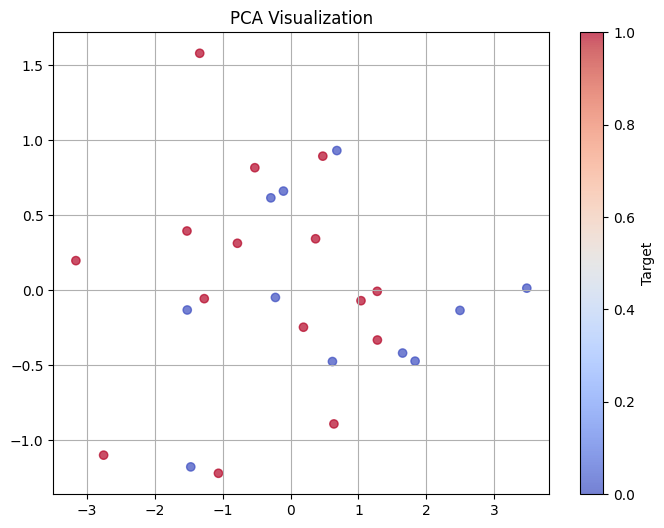

In [4]:
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import networkx as nx
from rdkit import Chem

# Load the dataset
data = pd.read_csv("./data/Molecular_Sample.csv")

# Preprocess the data
graphs = []
for smile in data['smiles']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features (degree centrality, betweenness centrality, closeness centrality)
    degree_centrality = list(nx.degree_centrality(G).values())
    betweenness_centrality = list(nx.betweenness_centrality(G).values())
    closeness_centrality = list(nx.closeness_centrality(G).values())
    features = np.column_stack((degree_centrality, betweenness_centrality, closeness_centrality))
    node_features.append(features)

# Aggregate node features (sum)
aggregated_features = [np.sum(features, axis=0) for features in node_features]

# Reshape the input arrays
X = np.array(aggregated_features)
y = data['p_np']

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title('PCA Visualization')
plt.xlabel('')
plt.ylabel('')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()


# 3. Graph regression task

## 3.1 Classifier: RandomForestRegressor with different graph features

### 3.1.1 Graph features as as a concatenation of node centralities (degree, closeness, betweenness)

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
import networkx as nx
from rdkit import Chem
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
data = pd.read_csv("./data/molecular_sample2.csv")

# Preprocess the data
graphs = []
for smile in data['smile']:
    mol = Chem.MolFromSmiles(smile)
    if mol is not None:
        graph = Chem.rdmolops.GetAdjacencyMatrix(mol)
        graphs.append(graph)

# Extract node features for each graph (degree centrality, betweenness centrality, closeness centrality)
node_features = []
for graph in graphs:
    G = nx.from_numpy_array(graph)
    degree_centrality = list(nx.degree_centrality(G).values())
    betweenness_centrality = list(nx.betweenness_centrality(G).values())
    closeness_centrality = list(nx.closeness_centrality(G).values())
    features = np.column_stack((degree_centrality, betweenness_centrality, closeness_centrality))
    node_features.append(features)

# Aggregate graph features (sum)
aggregated_features = [np.sum(features, axis=0) for features in node_features]

# Reshape the input arrays
X_train, X_test, y_train, y_test = train_test_split(aggregated_features, data['label'], test_size=0.2, random_state=42)
X_train_reshaped = np.array(X_train).reshape(-1, 3)  # 3 centrality features
X_test_reshaped = np.array(X_test).reshape(-1, 3)

# Train a regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.019631999060001876


In [108]:
node_features

[array([[0.03030303, 0.        , 0.14102564],
        [0.09090909, 0.11931818, 0.16336634],
        [0.03030303, 0.        , 0.14102564],
        [0.06060606, 0.17045455, 0.18965517],
        [0.09090909, 0.27651515, 0.22297297],
        [0.09090909, 0.3030303 , 0.2481203 ],
        [0.09090909, 0.26893939, 0.25      ],
        [0.09090909, 0.17897727, 0.22147651],
        [0.06060606, 0.06439394, 0.18644068],
        [0.06060606, 0.01609848, 0.16097561],
        [0.06060606, 0.00852273, 0.15492958],
        [0.06060606, 0.04924242, 0.17837838],
        [0.09090909, 0.12594697, 0.21019108],
        [0.06060606, 0.23484848, 0.2578125 ],
        [0.12121212, 0.49431818, 0.2704918 ],
        [0.03030303, 0.        , 0.21428571],
        [0.09090909, 0.39204545, 0.23913043],
        [0.03030303, 0.        , 0.19411765],
        [0.06060606, 0.30681818, 0.20886076],
        [0.09090909, 0.26893939, 0.18333333],
        [0.06060606, 0.08333333, 0.15865385],
        [0.06060606, 0.03030303, 0

In [107]:
aggregated_features

[array([2.3030303 , 4.69128788, 6.57579328]),
 array([2.17391304, 5.64426877, 4.02839675]),
 array([2.16666667, 4.81884058, 4.76999904]),
 array([2.28571429, 4.84656085, 5.49510287]),
 array([2.23076923, 4.00307692, 5.94728409]),
 array([2.26086957, 4.81818182, 4.59136372]),
 array([2.23076923, 5.74461538, 4.42618363]),
 array([2.26086957, 4.2055336 , 5.14945512]),
 array([2.30769231, 5.41846154, 4.68899781]),
 array([2.26666667, 3.41904762, 4.18238637]),
 array([2.16      , 4.86666667, 4.91690834]),
 array([2.27586207, 6.06896552, 4.69755845]),
 array([2.30769231, 5.27076923, 4.74709442]),
 array([2.19047619, 4.50952381, 4.47616242]),
 array([2.28571429, 4.56190476, 4.4424169 ]),
 array([2.2       , 4.8       , 4.06080726]),
 array([2.17391304, 4.9486166 , 4.50607272]),
 array([2.24      , 5.85      , 4.22091781]),
 array([2.22222222, 4.96581197, 5.2044128 ]),
 array([2.23076923, 4.39692308, 5.54944667])]

### 3.1.2 Graph features as a avarage clustering coefficient of node features


In [50]:
import pandas as pd
from rdkit import Chem
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

# Load dataset
data = pd.read_csv("./data/molecular_sample2.csv")

# Define a function to calculate average clustering coefficient for a molecular graph
def calculate_avg_clustering(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Convert molecule to a graph
        G = Chem.rdmolops.GetAdjacencyMatrix(mol)
        n = len(G)
        G = nx.Graph(G)
        # Calculate average clustering coefficient
        avg_clustering = nx.average_clustering(G)
        return avg_clustering
    else:
        return None


### Calculate average clustering coefficient for each molecule

In [51]:
data['avg_clustering'] = data['smile'].apply(calculate_avg_clustering)

# Remove rows with None values (failed to parse SMILES)
data = data.dropna()

# Separate features and labels
X = data[['avg_clustering']]
y = data['label']

### Train the model

In [18]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# For regression
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.017752402912754553
